# Exemple 2 : la fonction XOR

## 1. Importation des librairies

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time

# pour que les résultats soient reproductibles
# on peut observer que le réseau converge vers des solutions différentes en fonction de l'initialisation
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(1)

## 2. Définition des données d'apprentissage

In [17]:
# Définition des données d'apprentissage
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,0])

## 3. Architecture du réseau 

Pour vous aider : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [18]:
# À compléter
#
xor_model = tf.keras.models.Sequential()
#
# une première couche avec deux neurones (couche cachée) avec la fonction sigmoid comme fonction d'activation
xor_model.add(tf.keras.layers.Dense(2, input_shape=(2,) , activation='sigmoid'))

# une deuxième couche avec un neurones (couche de sortie) avec la fonction sigmoid comme fonction d'activation
xor_model.add(tf.keras.layers.Dense(1, input_shape=(2,) , activation='sigmoid'))

# Choix de la méthode d'optimisation
sgd = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

# Compilation du graphe et choix de la fonction de coût
xor_model.compile(sgd, loss='mean_squared_error', metrics=['accuracy'])


Création d'une instance de TensorBoard avec le chemin des fichiers de log


In [12]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(time()))

## 4. Apprentissage du réseau

In [19]:
xor_model.fit(X, Y, batch_size=1, epochs=1000, shuffle='True', callbacks=[tensorboard])

Epoch 1/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3127 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3005 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2674 - accuracy: 0.2500
Epoch 8/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.2283 - accuracy: 1.0000

2022-09-25 22:28:55.229157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.5000
Epoch 11/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2584 - accuracy: 0.5000
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2568 - accuracy: 0.5000
Epoch 13/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.7500
Epoch 14/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.5000
Epoch 15/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.5000
Epoch 16/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2575 - accuracy: 0.5000
Epoch 17/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2533 - accuracy: 0.5000
Epoch 18/1000
4/4 [======

## 5. Visualisation des résultats

1/1 [==============================] - 0s 10ms/step


2022-09-25 22:29:17.824002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step


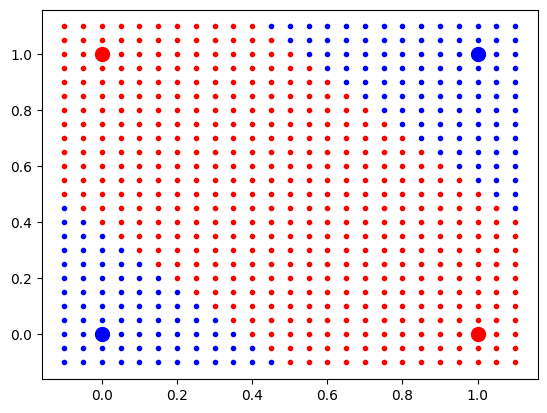

In [20]:
#Visualisation des frontières de décision
#On parcours l'espace d'entrée du réseau
from tabnanny import verbose


for i in np.arange(-0.1, 1.1, 0.05):
    for j in np.arange(-0.1, 1.1, 0.05):
        # On prédit la sortie du réseau pour chaque valeur de cet espace 
        z = xor_model.predict(np.array([[i,j]]), verbose=0)
        # On affiche le 
        if z>0.5 :
            plt.plot(i,j,'.r')
        else :
            plt.plot(i,j, '.b')

# Affichage de la base d'apprentissage
for i in range(Y.size) :
    if Y[i] == 1 :
        fig = plt.plot(X[i,0], X[i,1], 'ro')
    else :
        fig = plt.plot(X[i, 0], X[i, 1], 'bo')
    plt.setp(fig, markersize=10)

plt.show()

## 6. A faire

- Compléter le programme afin d'apprendre la fonction xor
- Modifier l'initialisation (valeur de la seed) et observer le résultat obtennu